In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,800 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import re

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

In [ ]:
filenames = glob.glob(os.path.join('gh_data','*.xlsx'))
filenames

['gh_data/단독다가구(매매)_실거래가_ (1).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (2).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (3).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (4).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (5).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (6).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (7).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (8).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (9).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (10).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (11).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (12).xlsx']

In [ ]:
# filenames 오름차순 정렬
filenames = sorted(filenames, key = lambda s: int(re.split('([0-9]+)', s)[1]),) # reverse = False : 오름차순 / reverse = True : 내림차순
filenames

['gh_data/단독다가구(매매)_실거래가_ (1).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (2).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (3).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (4).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (5).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (6).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (7).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (8).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (9).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (10).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (11).xlsx',
 'gh_data/단독다가구(매매)_실거래가_ (12).xlsx']

In [ ]:
df = pd.DataFrame() # empty dataframe

for f in filenames:
    data = pd.read_excel(f, header = 16).fillna(0)
    df = df.append(data)

In [ ]:
len(df)

93156

In [ ]:
df.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,강원도 강릉시 강동면 모전리,3**,단독,8m미만,64.20,205.0,201801,11~20,"10,520",2018.0,강동초교길
1,강원도 강릉시 견소동,2**,단독,12m미만,35.60,81.0,201801,1~10,"4,000",1990.0,창해로
2,강원도 강릉시 교동,9**,단독,12m미만,99.90,160.0,201801,11~20,"16,500",1982.0,원대로8번길
3,강원도 강릉시 교동,1***,단독,12m미만,326.88,211.6,201801,1~10,"64,300",2005.0,율곡초교길47번길
4,강원도 강릉시 교동,9**,단독,8m미만,154.99,240.2,201801,11~20,"19,000",1980.0,원대로20번길


In [ ]:
df.tail()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
4967,충청북도 충주시 용탄동,3**,단독,8m미만,84.50,228.0,201812,21~31,"5,700",1996.0,사래실길
4968,충청북도 충주시 중앙탑면 창동리,2**,단독,8m미만,42.34,383.0,201812,11~20,"3,800",1964.0,청금로
4969,충청북도 충주시 칠금동,7**,단독,12m미만,313.89,178.9,201812,1~10,"36,700",2004.0,칠금6길
4970,충청북도 충주시 호암동,1**,다가구,8m미만,368.28,285.0,201812,21~31,"65,000",2018.0,원호암3길
4971,충청북도 충주시 호암동,1**,단독,25m이상,40.67,492.0,201812,1~10,"20,500",1950.0,형설로


In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
# 데이터 정리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93156 entries, 0 to 93155
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       93156 non-null  object 
 1   번지        93156 non-null  object 
 2   주택유형      93156 non-null  object 
 3   도로조건      93156 non-null  object 
 4   연면적(㎡)    93156 non-null  float64
 5   대지면적(㎡)   93156 non-null  float64
 6   계약년월      93156 non-null  int64  
 7   계약일       93156 non-null  object 
 8   거래금액(만원)  93156 non-null  object 
 9   건축년도      93156 non-null  float64
 10  도로명       93156 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.8+ MB


In [ ]:
df.describe()

,연면적(㎡),대지면적(㎡),계약년월,건축년도
count,93156.000000,93156.000000,93156.000000,93156.000000
mean,160.954894,269.242972,201806.166763,1986.259608
std,153.372718,535.536227,3.306179,54.643186
min,4.860000,3.880000,201801.000000,0.000000
25%,69.410000,123.800000,201803.000000,1978.000000
50%,112.200000,186.100000,201806.000000,1989.000000
75%,191.900000,323.600000,201809.000000,2001.000000
max,5225.220000,119119.000000,201812.000000,2019.000000


In [ ]:
df['주택유형'].unique()

array(['단독', '다가구'], dtype=object)

In [ ]:
df['도로조건'].unique()

array(['8m미만', '12m미만', '25m미만', '-', '25m이상'], dtype=object)

In [ ]:
df['도로조건'] = df['도로조건'].replace(['-', 'm미만', '25m이상'], ['0', '', '26'], regex = True).astype(float)
df['도로조건'].unique()

array([ 8., 12., 25.,  0., 26.])

In [ ]:
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',', '').astype(float)

In [ ]:
df.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,강원도 강릉시 강동면 모전리,3**,단독,8.0,64.20,205.0,201801,11~20,10520.0,2018.0,강동초교길
1,강원도 강릉시 견소동,2**,단독,12.0,35.60,81.0,201801,1~10,4000.0,1990.0,창해로
2,강원도 강릉시 교동,9**,단독,12.0,99.90,160.0,201801,11~20,16500.0,1982.0,원대로8번길
3,강원도 강릉시 교동,1***,단독,12.0,326.88,211.6,201801,1~10,64300.0,2005.0,율곡초교길47번길
4,강원도 강릉시 교동,9**,단독,8.0,154.99,240.2,201801,11~20,19000.0,1980.0,원대로20번길


In [ ]:
s = df['계약년월'].astype(str)
df['연도'] = s.str[0:4].astype(int)
df['월'] = s.str[-2:].astype(int)

del df['계약년월']
df.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약일,거래금액(만원),건축년도,도로명,연도,월
0,강원도 강릉시 강동면 모전리,3**,단독,8.0,64.20,205.0,11~20,10520.0,2018.0,강동초교길,2018,1
1,강원도 강릉시 견소동,2**,단독,12.0,35.60,81.0,1~10,4000.0,1990.0,창해로,2018,1
2,강원도 강릉시 교동,9**,단독,12.0,99.90,160.0,11~20,16500.0,1982.0,원대로8번길,2018,1
3,강원도 강릉시 교동,1***,단독,12.0,326.88,211.6,1~10,64300.0,2005.0,율곡초교길47번길,2018,1
4,강원도 강릉시 교동,9**,단독,8.0,154.99,240.2,11~20,19000.0,1980.0,원대로20번길,2018,1


In [ ]:
del df['번지']
del df['계약일']
del df['도로명']
df.head()

,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월
0,강원도 강릉시 강동면 모전리,단독,8.0,64.20,205.0,10520.0,2018.0,2018,1
1,강원도 강릉시 견소동,단독,12.0,35.60,81.0,4000.0,1990.0,2018,1
2,강원도 강릉시 교동,단독,12.0,99.90,160.0,16500.0,1982.0,2018,1
3,강원도 강릉시 교동,단독,12.0,326.88,211.6,64300.0,2005.0,2018,1
4,강원도 강릉시 교동,단독,8.0,154.99,240.2,19000.0,1980.0,2018,1


In [ ]:
SiDo = []
SiGunGu = []
DongLi = []

for i in range(0,len(df['시군구'])):
    tmp = df['시군구'][i].split()  # 띄어쓰기로 split
    SiDo.append(tmp[0])            # 시/도
    SiGunGu.append(tmp[1])         # 시/군/구
    if len(tmp) > 3:
        DongLi.append(tmp[-1]+'('+tmp[2]+')')
    else:
        DongLi.append(tmp[-1])

df['SiDo'] = SiDo 
df['SiGunGu'] = SiGunGu
df['DongLi'] = DongLi

def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

sido_candi =  df['SiDo']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산','세종'] else '' for name in sido_candi]

sigun_candi = ['']*len(df)
for n in df.index:
#     print(n)
    each = df['SiGunGu'][n]
    if each[:2] in ['수원', '성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = each[:2] + ' ' + each[2:-1] #re.split('시', each)[0]+' '+ cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)
        
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]
ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]
df['ID'] = ID_candi

In [ ]:
df.head()

,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
0,강원도 강릉시 강동면 모전리,단독,8.0,64.20,205.0,10520.0,2018.0,2018,1,강원도,강릉시,모전리(강동면),강릉
1,강원도 강릉시 견소동,단독,12.0,35.60,81.0,4000.0,1990.0,2018,1,강원도,강릉시,견소동,강릉
2,강원도 강릉시 교동,단독,12.0,99.90,160.0,16500.0,1982.0,2018,1,강원도,강릉시,교동,강릉
3,강원도 강릉시 교동,단독,12.0,326.88,211.6,64300.0,2005.0,2018,1,강원도,강릉시,교동,강릉
4,강원도 강릉시 교동,단독,8.0,154.99,240.2,19000.0,1980.0,2018,1,강원도,강릉시,교동,강릉


In [ ]:
df['SiDo'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [ ]:
df['SiGunGu'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영양군', '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군',
       '칠곡군', '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군',
       '수성구', '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구',
    

In [ ]:
df['ID'].unique()

array(['강릉', '고성', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선',
       '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양 덕양', '고양 일산동',
       '고양 일산서', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천',
       '성남 분당', '성남 수정', '성남 중원', '수원 권선', '수원 영통', '수원 장안', '수원 팔달',
       '시흥', '안산 단원', '안산 상록', '안성', '안양 동안', '안양 만안', '양주', '양평', '여주',
       '연천', '오산', '용인 기흥', '용인 수지', '용인 처인', '의왕', '의정부', '이천', '파주',
       '평택', '포천', '하남', '화성', '거제', '거창', '김해', '남해', '밀양', '사천', '산청',
       '양산', '의령', '진주', '창녕', '창원 마산합포', '창원 마산회원', '창원 성산', '창원 의창',
       '창원 진해', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미',
       '군위', '김천', '문경', '봉화', '상주', '성주', '안동', '영덕', '영양', '영주', '영천',
       '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '포항 남', '포항 북', '광주 광산',
       '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성',
       '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구',
       '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 

In [ ]:
# df.to_excel('gh_data/2018_modified_data.xlsx', index = None, encoding = 'utf-8') # 파일 저장

In [ ]:
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_excel('gh_data/2018_modified_data.xlsx', index_col = None, header = 0, encoding = 'utf-8')
house_data = df.copy()

In [ ]:
house_data.head()

,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
0,강원도 강릉시 강동면 모전리,단독,8.0,64.20,205.0,10520.0,2018.0,2018,1,강원도,강릉시,모전리(강동면),강릉
1,강원도 강릉시 견소동,단독,12.0,35.60,81.0,4000.0,1990.0,2018,1,강원도,강릉시,견소동,강릉
2,강원도 강릉시 교동,단독,12.0,99.90,160.0,16500.0,1982.0,2018,1,강원도,강릉시,교동,강릉
3,강원도 강릉시 교동,단독,12.0,326.88,211.6,64300.0,2005.0,2018,1,강원도,강릉시,교동,강릉
4,강원도 강릉시 교동,단독,8.0,154.99,240.2,19000.0,1980.0,2018,1,강원도,강릉시,교동,강릉


In [ ]:
del house_data['시군구']
house_data.head()

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
0,단독,8.0,64.20,205.0,10520.0,2018.0,2018,1,강원도,강릉시,모전리(강동면),강릉
1,단독,12.0,35.60,81.0,4000.0,1990.0,2018,1,강원도,강릉시,견소동,강릉
2,단독,12.0,99.90,160.0,16500.0,1982.0,2018,1,강원도,강릉시,교동,강릉
3,단독,12.0,326.88,211.6,64300.0,2005.0,2018,1,강원도,강릉시,교동,강릉
4,단독,8.0,154.99,240.2,19000.0,1980.0,2018,1,강원도,강릉시,교동,강릉


In [ ]:
# 데이터 탐색

In [ ]:
# 한글 폰트 설정
#import matplotlib as mpl
#mpl.rc('font', family = 'Malgun Gothic')

#%matplotlib inline
#mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
house_data['주택유형'].unique()

array(['단독', '다가구'], dtype=object)

In [ ]:
house_data['주택유형'][house_data['주택유형'] == '단독'].count(), house_data['주택유형'][house_data['주택유형'] == '다가구'].count()

(84367, 8789)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

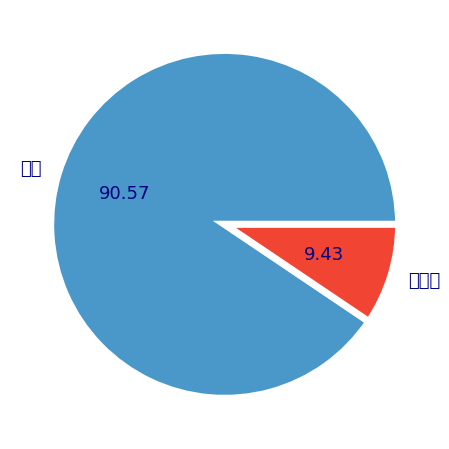

In [ ]:
fig_pie = plt.figure(figsize = (8, 8))
house_type = house_data['주택유형'].unique()
num1 = house_data['주택유형'][house_data['주택유형'] == '단독'].count()
num2 = house_data['주택유형'][house_data['주택유형'] == '다가구'].count()
num_type = [num1, num2]

plt.rcParams['text.color'] = 'Navy'
a, b = [plt.cm.Blues, plt.cm.Reds]
plt.pie(num_type, labels = house_type, colors = [a(0.6), b(0.6)], autopct = '%.2f',
       wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'},
       textprops = {'fontsize' : 18})

plt.show()

In [ ]:
house_data['도로조건'].value_counts()

8.0     68171
12.0    18450
25.0     4078
0.0      1365
26.0     1092
Name: 도로조건, dtype: int64

In [ ]:
house_data = house_data[house_data['도로조건'] > 0] # 도로가 없는 경우 제거

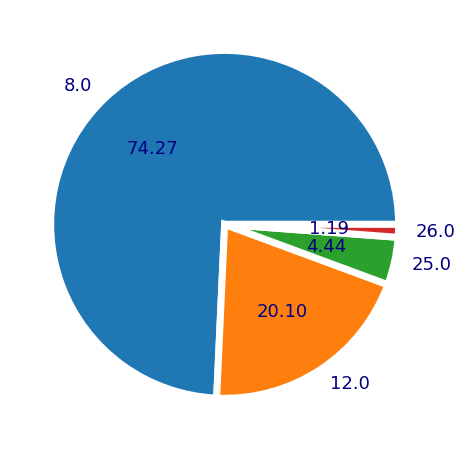

In [ ]:
fig_pie = plt.figure(figsize = (8, 8))
house_type = house_data['도로조건'].unique()
num1 = house_data['도로조건'][house_data['도로조건'] == 8].count()
num2 = house_data['도로조건'][house_data['도로조건'] == 12].count()
num3 = house_data['도로조건'][house_data['도로조건'] == 25].count()
num4 = house_data['도로조건'][house_data['도로조건'] == 26].count()
num_road = [num1, num2, num3, num4]

plt.rcParams['text.color'] = 'Navy'
plt.pie(num_road, labels = house_type, autopct = '%.2f',
       wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'},
       textprops = {'fontsize' : 18})

plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


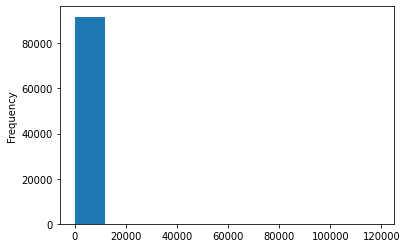

In [ ]:
house_data['대지면적(㎡)'].plot(kind='hist')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

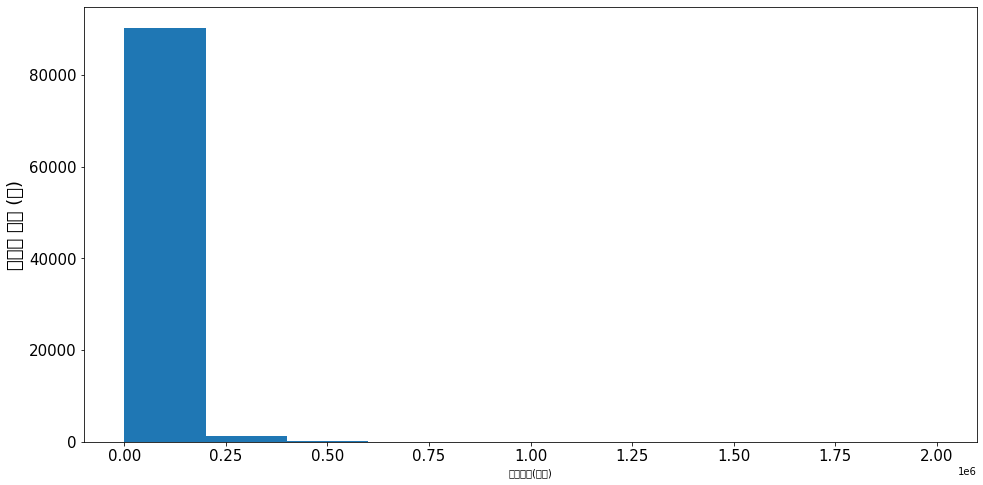

In [ ]:
fig_hist = plt.figure(figsize = (16, 8))

plt.hist(house_data['거래금액(만원)'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('거래금액(만원)')
plt.ylabel('부동산 거래 (건)', fontsize = 18)

plt.show()

In [ ]:
house_data.loc[house_data['거래금액(만원)'].idxmax()]

주택유형                 단독
도로조건                 25
연면적(㎡)           817.69
대지면적(㎡)          1100.8
거래금액(만원)    1.99813e+06
건축년도               1966
연도                 2018
월                     7
SiDo              서울특별시
SiGunGu             종로구
DongLi              가회동
ID                서울 종로
Name: 56414, dtype: object

In [ ]:
house_data['거래금액(만원)'].nlargest(5)

56414    1998130.0
85528    1835000.0
71582    1612731.0
47734    1410000.0
20721    1357500.0
Name: 거래금액(만원), dtype: float64

In [ ]:
house_data['거래금액(만원)'].describe()

count    9.179100e+04
mean     4.145255e+04
std      5.315770e+04
min      1.500000e+02
25%      1.200000e+04
50%      2.560000e+04
75%      5.284000e+04
max      1.998130e+06
Name: 거래금액(만원), dtype: float64

In [ ]:
# 평균과 표준편차 이용 이상치 제거
house_value_mean = house_data['거래금액(만원)'].mean()
house_value_std = house_data['거래금액(만원)'].std()

print(house_value_mean, house_value_std)

41452.551688073996 53157.70197397065


In [ ]:
len(house_data[house_data['거래금액(만원)'] < house_value_mean + 2*house_value_std])

88593

In [ ]:
house_data = house_data[house_data['거래금액(만원)']
                       < house_value_mean + 2*house_value_std]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

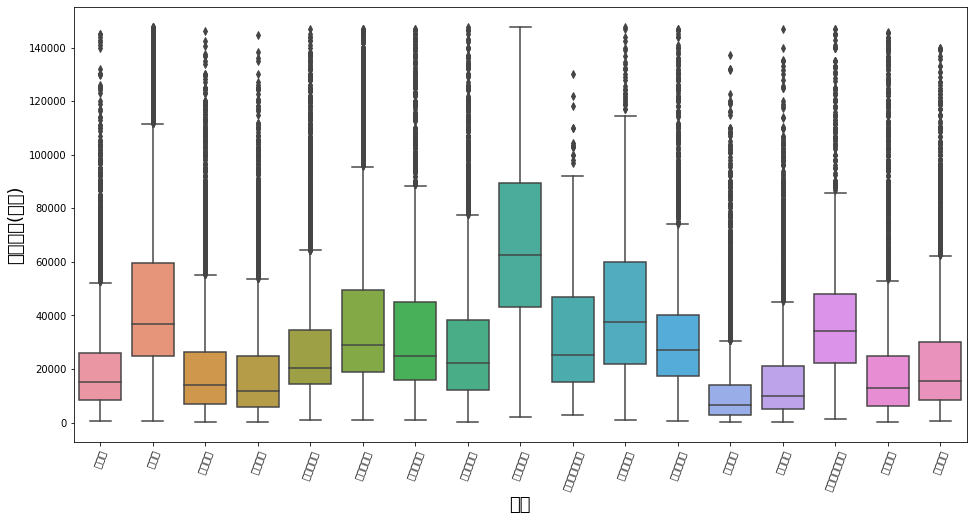

In [ ]:
fig = plt.figure(figsize = (16,8))
sns.boxplot(x = 'SiDo', y = '거래금액(만원)', data = house_data)

plt.xlabel('지역', fontsize = 18)
plt.ylabel('거래금액(만원)', fontsize = 18)
plt.xticks(rotation = 70)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_

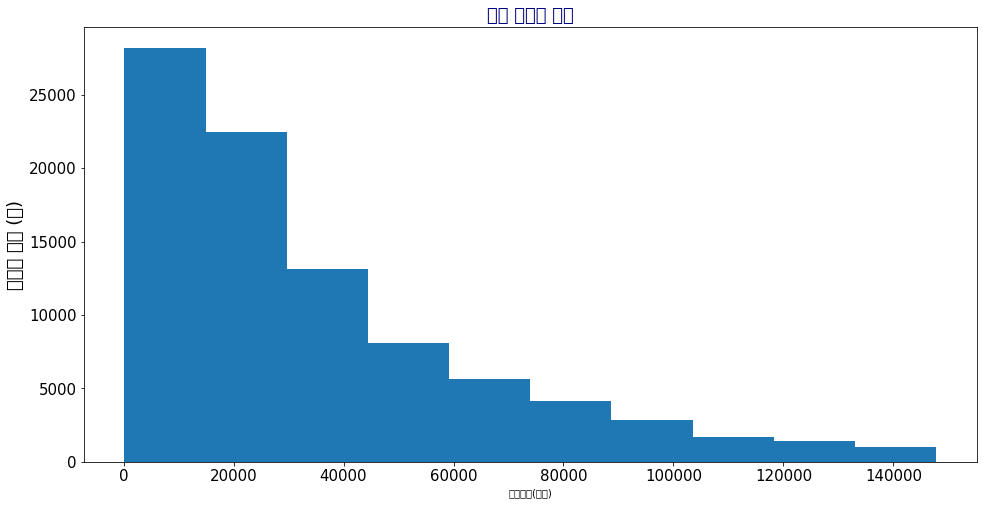

In [ ]:
fig_hist = plt.figure(figsize = (16, 8))

plt.hist(house_data['거래금액(만원)'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('거래금액(만원)')
plt.ylabel('부동산 거래 (건)', fontsize = 18)
plt.title('월별 부동산 거래', fontsize = 18)

plt.show()

In [ ]:
# 월별 패턴 파악

month = list(range(1,13))
month_num = []
for m in month:
    month_num.append(house_data['월'][house_data['월'] == m].count())
    
print(month)
print(month_num)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[7497, 6576, 9880, 8337, 8540, 7897, 7074, 7263, 7042, 7422, 6364, 4701]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_

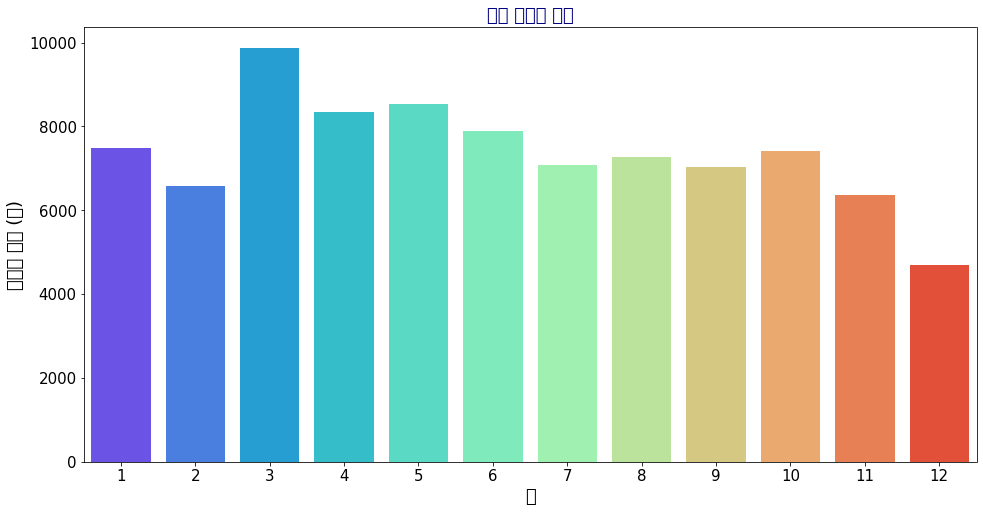

In [ ]:
fig_bar = plt.figure(figsize = (16, 8))

sns.barplot(x = month, y = month_num, palette = 'rainbow')
#palette = 'rainbow' #palette = 'rocket'

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('월', fontsize = 18)
plt.ylabel('부동산 거래 (건)', fontsize = 18)
plt.title('월별 부동산 거래', fontsize = 18)

plt.show()

In [ ]:
house_data['SiDo'].value_counts()

경기도        13738
서울특별시      11508
대구광역시       7481
경상남도        6312
경상북도        6216
부산광역시       6140
전라남도        5900
광주광역시       5363
전라북도        4533
강원도         4257
충청남도        3991
충청북도        3830
대전광역시       3325
인천광역시       3155
제주특별자치도     1608
울산광역시        990
세종특별자치시      246
Name: SiDo, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_

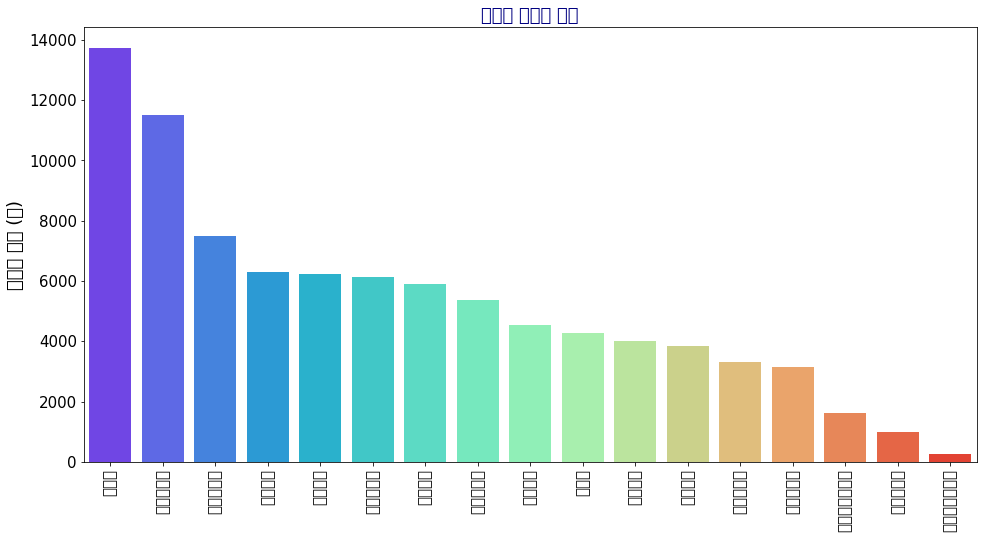

In [ ]:
# 지역별 패턴 파악

fig = plt.figure(figsize = (16, 8))

region_counts = house_data['SiDo'].value_counts()
sns.barplot(x = region_counts.index, y = region_counts, palette = 'rainbow')

plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('부동산 거래 (건)', fontsize = 18)
plt.title('지역별 부동산 거래', fontsize = 18)
plt.grid(False)

plt.show()

In [ ]:
house_data[['연면적(㎡)', '대지면적(㎡)']].describe()

,연면적(㎡),대지면적(㎡)
count,88593.000000,88593.000000
mean,151.532877,262.814051
std,131.109247,494.039036
min,4.860000,3.880000
25%,68.320000,122.000000
50%,108.670000,182.000000
75%,182.340000,317.000000
max,4184.560000,119119.000000


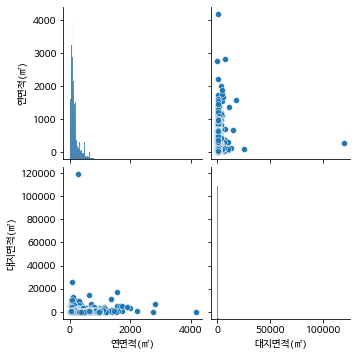

In [ ]:
sns.pairplot(house_data[['연면적(㎡)','대지면적(㎡)']])

In [ ]:
# 평균과 표준편차 이용 이상치 제거
house_total_area_mean = house_data['연면적(㎡)'].mean()
house_total_area_std = house_data['연면적(㎡)'].std()

print(house_total_area_mean, house_total_area_std)

house_area_mean = house_data['대지면적(㎡)'].mean()
house_area_std = house_data['대지면적(㎡)'].std()

print(house_area_mean, house_area_std)

151.53287663811082 131.1092473522182
262.8140509972595 494.0390362198663


In [ ]:
print(len(house_data), len(house_data[house_data['연면적(㎡)'] > house_total_area_mean + 2*house_total_area_std]))
print(len(house_data), len(house_data[house_data['대지면적(㎡)'] > house_area_mean + 2*house_area_std]) )

88593 5316
88593 577


In [ ]:
house_area_mean + 2*house_area_std

1250.8921234369923

In [ ]:
house_total_area_mean + 2*house_total_area_std

413.75137134254726

In [ ]:
house_data[house_data['연면적(㎡)'] > 3000]

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
22710,단독,8.0,4184.56,163.0,36000.0,1997.0,2018,3,인천광역시,남동구,만수동,인천 남동


In [ ]:
house_data[house_data['대지면적(㎡)'] > 3000]

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
5505,단독,8.0,268.76,119119.00,70000.0,1992.0,2018,1,서울특별시,영등포구,신길동,서울 영등포
6777,단독,12.0,1558.07,4812.00,53800.0,1996.0,2018,1,전라북도,부안군,백석리(주산면),부안
9180,단독,8.0,84.89,4190.14,45000.0,2014.0,2018,2,경기도,화성시,반송동,화성
9640,단독,8.0,325.40,3565.00,65000.0,1998.0,2018,2,경상남도,통영시,서산리(욕지면),통영
9935,단독,12.0,142.60,7963.00,11700.0,2010.0,2018,2,경상북도,영주시,수철리(풍기읍),영주
...,...,...,...,...,...,...,...,...,...,...,...,...
89049,다가구,12.0,656.00,14559.00,50000.0,2016.0,2018,12,경기도,파주시,덕천리(파평면),파주
89285,단독,8.0,425.80,3430.00,83600.0,2010.0,2018,12,경상남도,사천시,송포동,사천
92292,단독,8.0,52.80,4661.00,1400.0,1987.0,2018,12,전라북도,고창군,검산리(상하면),고창
92718,단독,8.0,120.91,3279.00,22000.0,2014.0,2018,12,충청남도,논산시,고내리(연무읍),논산


In [ ]:
house_data = house_data[house_data['대지면적(㎡)'] < 3000] # 대지면적이 3000 이하인 row 삭제
house_data = house_data[house_data['연면적(㎡)'] < 3000]   # 연면적이 3000 이하인 row 삭제

In [ ]:
house_data['건축년도'].describe()

count    88519.000000
mean      1985.962776
std         53.738153
min          0.000000
25%       1978.000000
50%       1989.000000
75%       2001.000000
max       2019.000000
Name: 건축년도, dtype: float64

In [ ]:
house_data = house_data[house_data['건축년도'] > 0]

In [ ]:
house_data['건축년도'].describe()

count    88466.000000
mean      1987.152567
std         22.917170
min        199.000000
25%       1978.000000
50%       1989.000000
75%       2001.000000
max       2019.000000
Name: 건축년도, dtype: float64

In [ ]:
house_data['건축년도'].nsmallest(10)

45273     199.0
8018      976.0
3065      987.0
20378     987.0
46024     987.0
37289     992.0
377      1900.0
411      1900.0
416      1900.0
418      1900.0
Name: 건축년도, dtype: float64

In [ ]:
house_data = house_data[house_data['건축년도'] > 1000] #건축년도가 1900 이하인 row 삭제 (data 입력 오류)

In [ ]:
house_data.reset_index(inplace = True, drop  = True) # 인덱스 정리 
len(house_data)

88460

In [ ]:
# house_data.to_excel('gh_data/2018_modified_data.xlsx', index = None, encoding = 'utf-8') # 파일 저장

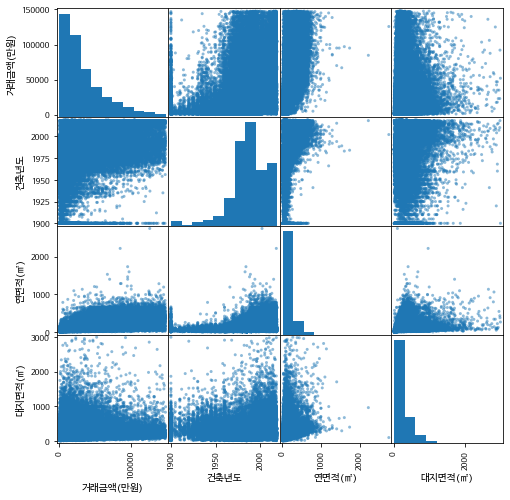

In [ ]:
attributes = ['거래금액(만원)', '건축년도', '연면적(㎡)', '대지면적(㎡)']
fig = scatter_matrix(house_data[attributes], figsize = (8,8))

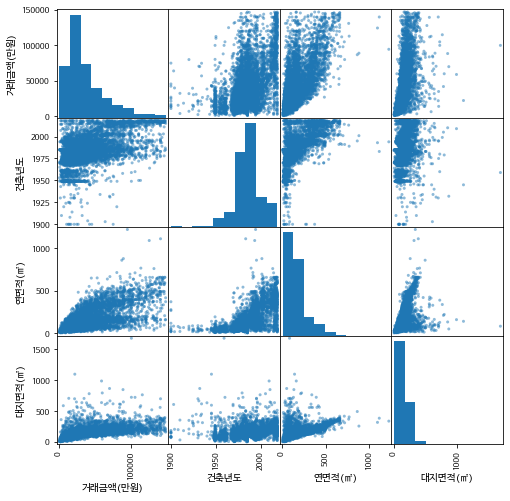

In [ ]:
house_data_daegu = house_data[house_data['SiDo'] == '대구광역시']
fig = scatter_matrix(house_data_daegu[attributes], figsize = (8,8))

plt.show()

In [ ]:
# 건물의 유사도 계산 알고리즘 1
def Euclidean(region, H):
    r = region.split(' ')
    idx = (df['SiDo'] == r[0])&(df['SiGunGu'] == r[1])&(df['DongLi'] == r[2])
    temp_df = df[idx]
    if len(temp_df) == 0:
        print('해당 조건의 집이 없습니다.')
    else:
        list_col = ['연면적(㎡)', '대지면적(㎡)', '건축년도', '거래금액(만원)']
        difference = (temp_df[list_col] - H)/temp_df[list_col].std()
        difference = np.square(difference).sum(axis=1)
        distance = np.sqrt(difference)
        temp_df['distance'] = np.sqrt(distance)
        if len(temp_df) == 0:
            print('해당 조건의 집이 없습니다.')
        else:
            temp_df = temp_df.sort_values(by = ['distance'])
            temp_df.reset_index(inplace = True, drop = True)
            return temp_df

In [ ]:
region = '대구광역시 북구 복현동'
# h1 = 연면적, h2 = 대지면적, h3 = 건축년도, h4 = 거래금액
h1 = 300; h2 = 250 ;h3 = 2010; h4 = 60000
H = (h1, h2, h3, h4)

Euclidean(region, H)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID,distance
0,대구광역시 북구 복현동,단독,8.0,299.70,217.0,63300.0,2013.0,2018,4,대구광역시,북구,복현동,대구 북구,0.635628
1,대구광역시 북구 복현동,단독,8.0,417.99,218.0,60000.0,2009.0,2018,1,대구광역시,북구,복현동,대구 북구,0.907315
2,대구광역시 북구 복현동,단독,12.0,241.68,140.6,55000.0,2014.0,2018,6,대구광역시,북구,복현동,대구 북구,1.096455
3,대구광역시 북구 복현동,단독,12.0,446.38,173.5,77800.0,2009.0,2018,9,대구광역시,북구,복현동,대구 북구,1.133452
4,대구광역시 북구 복현동,단독,8.0,493.04,204.9,60800.0,2001.0,2018,9,대구광역시,북구,복현동,대구 북구,1.211362
5,대구광역시 북구 복현동,단독,8.0,329.37,198.4,60000.0,1991.0,2018,6,대구광역시,북구,복현동,대구 북구,1.217204
6,대구광역시 북구 복현동,단독,8.0,197.96,116.1,42500.0,2009.0,2018,1,대구광역시,북구,복현동,대구 북구,1.246429
7,대구광역시 북구 복현동,다가구,8.0,202.74,137.7,25900.0,2002.0,2018,11,대구광역시,북구,복현동,대구 북구,1.275931
8,대구광역시 북구 복현동,다가구,8.0,460.85,232.0,120000.0,2013.0,2018,5,대구광역시,북구,복현동,대구 북구,1.333892
9,대구광역시 북구 복현동,단독,8.0,196.93,154.0,26000.0,1994.0,2018,3,대구광역시,북구,복현동,대구 북구,1.353598


In [ ]:
#Euclidean(region, H).head()

In [ ]:
# 건물의 유사도 계산 알고리즘 2
def Mahalanobis(region, H):
    r = region.split(' ')
    idx = (df['SiDo'] == r[0])&(df['SiGunGu'] == r[1])&(df['DongLi'] == r[2])
    temp_df = df[idx]
    if len(temp_df) == 0:
        print('해당 조건의 집이 없습니다.')
    else:
        list_col = ['연면적(㎡)', '대지면적(㎡)', '건축년도', '거래금액(만원)']
        df1 = temp_df[list_col]
        Cov = np.cov(df1.T)
        Cov_inv = np.linalg.inv(Cov)

        tmp = np.dot(abs(df1-H),Cov_inv)
        tmp = np.dot(tmp,abs(df1-H).T)
        distance = np.sqrt(np.diag(tmp))

        temp_df['distance'] = distance

        temp_df = temp_df.sort_values(by = ['distance'])
        temp_df.reset_index(inplace = True, drop = True)

        return temp_df

In [ ]:
Mahalanobis(region, H)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID,distance
0,대구광역시 북구 복현동,단독,8.0,299.70,217.0,63300.0,2013.0,2018,4,대구광역시,북구,복현동,대구 북구,0.896501
1,대구광역시 북구 복현동,단독,8.0,417.99,218.0,60000.0,2009.0,2018,1,대구광역시,북구,복현동,대구 북구,1.449746
2,대구광역시 북구 복현동,다가구,8.0,202.74,137.7,25900.0,2002.0,2018,11,대구광역시,북구,복현동,대구 북구,1.487481
3,대구광역시 북구 복현동,단독,12.0,446.38,173.5,77800.0,2009.0,2018,9,대구광역시,북구,복현동,대구 북구,1.496328
4,대구광역시 북구 복현동,단독,8.0,196.93,154.0,26000.0,1994.0,2018,3,대구광역시,북구,복현동,대구 북구,2.068604
5,대구광역시 북구 복현동,단독,8.0,197.96,116.1,42500.0,2009.0,2018,1,대구광역시,북구,복현동,대구 북구,2.071234
6,대구광역시 북구 복현동,다가구,12.0,376.91,181.1,125000.0,2018.0,2018,11,대구광역시,북구,복현동,대구 북구,2.189355
7,대구광역시 북구 복현동,단독,8.0,493.04,204.9,60800.0,2001.0,2018,9,대구광역시,북구,복현동,대구 북구,2.255214
8,대구광역시 북구 복현동,다가구,8.0,467.81,205.9,118000.0,2016.0,2018,3,대구광역시,북구,복현동,대구 북구,2.309978
9,대구광역시 북구 복현동,단독,8.0,117.47,116.0,8000.0,1990.0,2018,6,대구광역시,북구,복현동,대구 북구,2.310015


In [ ]:
import json

In [ ]:
# 필터링 알고리즘
'''
사용할 변수 : 지역, 연면적, 대지면적, 거래금액, 건축년도
지역은 입력 값과 동일한 지역으로 고정
연면적, 대지면적은 입력 값에서 +-100 정도
거래 금액은 입력 값에서 +-1억 정도
건축년도는 입력 값에서 +-5 정도
'''

def Filter(H):
    idx = (df['SiDo'] == H[0])
    temp_df = df[idx]
    if len(temp_df) == 0:
        print('해당 조건의 집이 없습니다.')
    else:
        #idx1 = abs(temp_df['연면적(㎡)'] - H[1]) <= 100
        #idx2 = abs(temp_df['대지면적(㎡)'] - H[2]) <= 100
        idx3 = abs(temp_df['거래금액(만원)'] - H[1]) <= 10000
        idx4 = abs(temp_df['건축년도'] - H[2]) <= 5

        temp_df1 = temp_df[idx3&idx4]

        my_house_seoul = pd.DataFrame(temp_df1['SiGunGu'].value_counts())
        my_house_seoul.columns = ['Count']

        my_house_seoul['index'] = my_house_seoul.index
        my_house_seoul.reset_index(inplace=True, drop=True)

        Idx = pd.DataFrame((df[df['SiDo']=='서울특별시'])['SiGunGu'].unique())
        Idx.columns = ['index']

        my_house_seoul_num = pd.merge(Idx, my_house_seoul, on='index', how='left')
        my_house_seoul_num.fillna(0, inplace=True)

        my_house_seoul_num.columns = ['SiGunGu', 'Count']
        my_house_seoul_num.set_index(my_house_seoul_num['SiGunGu'], inplace=True)

        my_house_seoul_num.drop(columns = ['SiGunGu'], inplace=True)

        return my_house_seoul_num

In [ ]:
my_house_seoul_num = Filter(('서울특별시',100000,2000))

In [ ]:
geo_seoul = json.load(open('gh_data/seoul_municipalities_geo_simple.json'))
# geo_seoul = json.load(open('gh_data/Seoul_Gu.json'))

In [ ]:
geo_seoul.keys()

dict_keys(['type', 'features'])

In [ ]:
geo_seoul['features'][0]['geometry']['coordinates'][0] # 위도, 경도 표시

[[127.11519584981606, 37.557533180704915],
 [127.16683184366129, 37.57672487388627],
 [127.18408792330152, 37.55814280369575],
 [127.16530984307447, 37.54221851258693],
 [127.14672806823502, 37.51415680680291],
 [127.12123165719615, 37.52528270089],
 [127.1116764203608, 37.540669955324965],
 [127.11519584981606, 37.557533180704915]]

In [ ]:
geo_seoul['features'][0]['id'], geo_seoul['features'][0]['properties']['name']

('강동구', '강동구')

In [ ]:
import folium

In [ ]:
folium.Map(location = [37.5502, 126.982], min_zoom = 11, max_zoom = 11, tiles = 'Stamen Toner')

In [ ]:
map = folium.Map(location = [37.5502, 126.982], min_zoom = 11, max_zoom = 11, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_seoul,
              data = my_house_seoul_num['Count'],
              columns = [my_house_seoul_num.index, my_house_seoul_num['Count']],
              fill_color = 'YlGn',
              legend_name = 'Count',
              key_on = 'feature.id')

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
